<a href="https://colab.research.google.com/github/LeonMilosevic/home_credit/blob/main/home_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Home Credit Default Risk Competition

### Intro

Introduction: \

https://www.kaggle.com/c/home-credit-default-risk/overview

In Home Credit Default Risk Competition we need to make a model, that will give us a probability that the given client repays the loan. This should help the business decide if they should or should not proivde financial loan to a given customer.

Problem:

It is a binary classification problem:
- Will repay the loan = 0
- Will not repay the loan = 1

Evaluation Criteria:

Based on the requirements of the competition, we will need to evaluate our models on ***roc_auc_score*** metric.

Data:

- application_{train|test}.csv (main file)
- bureau.csv
- bureau_balance.csv
- POS_CASH_balance.csv
- credit_card_balance.csv
- previous_application.csv
- installments_payments.csv
- HomeCredit_columns_description.csv

Approach:
- Explore the data of application_train
- Create baseline model
- Improve model with feature engineering
- Explore other files
- Add usefull features from other files
- Test models on new features
- Feature Engineering


Imports

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
from scipy.stats import chi2_contingency

Files

In [2]:
app_train = pd.read_csv('application_train.csv')

In [ ]:
app_train.shape

(307511, 122)

In [ ]:
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Custom Functions

In [ ]:
def check_missing_values(df: pd.DataFrame) -> pd.DataFrame:
  """Checks for missing values in the dataframe

    Args:
        df (pd.DataFrame): DataFrame to be scanned for missing values
    Returns:
        Dataframe of features that are mostly missing with percentage and total count
  """
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

  return pd.concat([total, percent], axis=1, keys=['total', 'percent'])

### Missing Values

In [ ]:
missing_values = check_missing_values(app_train)
missing_values[:50]

,total,percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550


In [ ]:
missing_values[50:70]

,total,percent
EXT_SOURCE_3,60965,0.198253
AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
AMT_REQ_CREDIT_BUREAU_YEAR,41519,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
AMT_REQ_CREDIT_BUREAU_HOUR,41519,0.135016
NAME_TYPE_SUITE,1292,0.004201
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003320


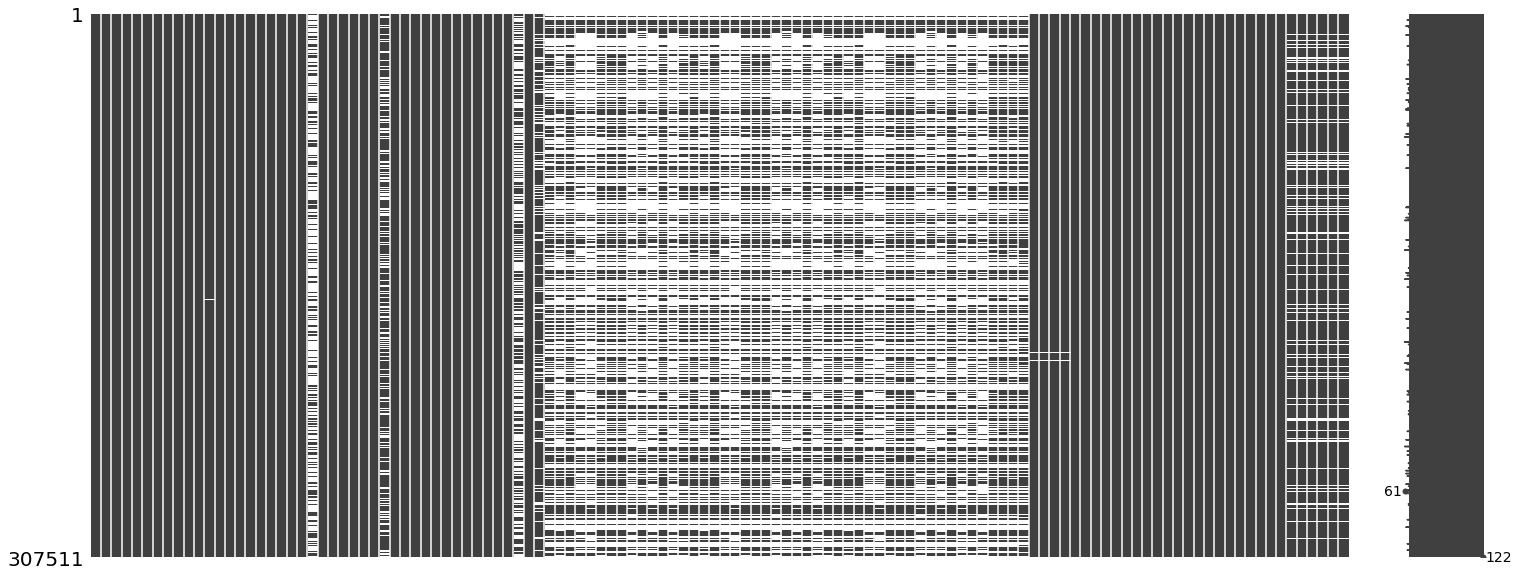

In [5]:
msno.matrix(app_train)

**Missing Data Conclusions**: \
- According to Docs, missing values occured due to clients/clerks not filling them in, that can be either to clients not having an apartment but having a house, or the opposite. It can also be due to not finding relevance in filling in those values. At this moment there is no way of determining if the client owns a house or an apartment and we cannot impute or flag the values with certainty. This is something we need to keep in mind for feature eng.

- Most of the data that has high percentage of missing values is house/apartment information
- OWN_CAR_AGE
- OCCUPATION_TYPE
- EXT_SOURCE_X comes from external source
- AMT_REQ_X did the client previously applied for a loan or not
- the rest is a very small percentage so we will impute it with a median value

Explore further EXT_SOURCE_X, can we impute missing values

AMT_REQ_X, is this due to the clients never previously applied? Check it against the columns that are indicating has the client priviously applied

OWN_CAR_AGE, is this due to client not having a car? we need to compare it with column has a car

###### Housing/Apartment missing values

We will use Chi-Square test do determain if there is a difference between clients who did not fill in housing/apartment values and clients who did.

H0: there is no difference between two groups \
H1: there is a difference between two groups \
Statistical Significance: 0.05 \

If there is a difference between two groups, we will add a flag feature to tell us weather the person has filled in apartment discription or not.


**Approach**: \
After consulting the documentation, there are 47 features describing the housing/apartment. \

We can assume that clients who own a house could've skipped filling in values for apartment and vice versa, therefore we shouldn't check if a client didn't fill in 47 variables, we could lower the threshold to 35 since there are at least 9 variables that are indicating that the variable is only from apartment domain. 


In [67]:
chi_test_data = app_train.copy()

chi_test_data['has_missing_housing_info'] = 1
chi_test_data.loc[chi_test_data.isnull().sum(axis=1) < 35, 'has_missing_housing_info'] = 0
chi_test_data['has_missing_housing_info'].value_counts(normalize=True)

1    0.503624
0    0.496376
Name: has_missing_housing_info, dtype: float64

In [69]:
pd.crosstab(chi_test_data.has_missing_housing_info, chi_test_data.TARGET)

TARGET,0,1
has_missing_housing_info,,
0,142035,10606
1,140651,14219


In [73]:
chi_test = chi2_contingency(pd.crosstab(chi_test_data.has_missing_housing_info, chi_test_data.TARGET))
p = chi_test[1]
if p < 0.05:
  print(p, " => reject H0")
else:
  print(p, " => fail to reject H0")

2.872947219627193e-114  => reject H0


Given that P value is less then our significance threshold , we can reject the null hypothesis saying that there is no difference between clients who fill in information, and clients who skip filling in information.

###### OWN_CAR_AGE variable

In [81]:
app_train['OWN_CAR_AGE'].isnull().sum()

202929

In [98]:
app_train[app_train['FLAG_OWN_CAR'] == 'N'].shape

(202924, 122)

In [99]:
app_train[(app_train['FLAG_OWN_CAR'] == 'N') & (app_train['OWN_CAR_AGE'].isnull())].shape

(202924, 122)

In [101]:
own_car_age_show = {'own_car_age_missing': [202929], 
                    'dont_own_car': [202924], 
                    'dont_own_car_and_own_car_age_missing': [202924], 
                    'own_car_and_car_age_missing': [6]}
own_car_age_df = pd.DataFrame(data=own_car_age_show)
own_car_age_df

,own_car_age_missing,dont_own_car,dont_own_car_and_own_car_age_missing,own_car_and_car_age_missing
0,202929,202924,202924,6


This is an interesting finding, all the clients that don't own a car have missing values for OWN_CAR_AGE variable. There are 6 clients who have a car but haven't filled in the OWN_CAR_AGE. 

#### Conclusion: 
**Appartment/Housing**: Given the apartment/housing missing information result, we should highly consider flagging clients who fail to provide housing/apartment information. \
**own_car_age**: There is a correlation between a client not owning a car and having NaN in own_car_age. 

### EDA

In [57]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

Looking at the Train Data briefly: \

We can see our target variable, it contains 0 and 1 values, with a mean of 0.08 and we can interpret that as a high class imbalance, we should explore it more.

There are encoded values with 0-1, we should consult documentation a bit later when we explore each feature more.

We can as well see drastic difference between max value of some features, we should consider scaling features.

In [ ]:
app_train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

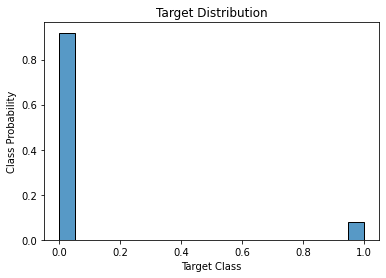

In [ ]:
ax = sns.histplot(app_train['TARGET'], stat='probability')
ax.set(xlabel="Target Class", ylabel='Class Probability', title="Target Distribution")
plt.show()

We can see that the class is highly imbalanced, meaning that there are more people who payed back the loan, rather than the ones who did not. We should keep in mind when performing cross-validation, to use Stratified K-Fold to keep the ratio of values in each fold. As well we can try SMOTE to make the value balanced.